In [40]:
from residuated_binars.generate_theories import generate_isabelle_theory_file
from residuated_binars.constants import (
    RESIDUATED_BINAR, FALSE_DISTRIBUTIVITY_LAWS, ASSOCIATIVITY, LEFT_IDENTITY, RIGHT_IDENTITY
)
import os
import shutil

shutil.rmtree("hyp", ignore_errors=True)
os.mkdir("hyp")
theory_text = generate_isabelle_theory_file(
    "Test",
    RESIDUATED_BINAR + [ASSOCIATIVITY.replace("f(", "mult("), LEFT_IDENTITY.replace("f(", "mult("), RIGHT_IDENTITY.replace("f(", "mult(")],
    FALSE_DISTRIBUTIVITY_LAWS[0]
)
with open("hyp/Test.thy", "w") as test_task:
    test_task.writelines("\n".join(theory_text))

In [41]:
from residuated_binars.add_task import add_task, TaskType

add_task("hyp", "task", TaskType.NITPICK, 4)

In [42]:
!cat task/Test.thy

theory Test
imports Main
begin
lemma "(
(\<forall> x::nat. \<forall> y::nat. meet(x, y) = meet(y, x)) &
(\<forall> x::nat. \<forall> y::nat. join(x, y) = join(y, x)) &
(\<forall> x::nat. \<forall> y::nat. \<forall> z::nat. meet(x, meet(y, z)) = meet(meet(x, y), z)) &
(\<forall> x::nat. \<forall> y::nat. \<forall> z::nat. join(x, join(y, z)) = join(join(x, y), z)) &
(\<forall> x::nat. \<forall> y::nat. meet(x, join(x, y)) = x) &
(\<forall> x::nat. \<forall> y::nat. join(x, meet(x, y)) = x) &
(\<forall> x::nat. meet(x, x) = x) &
(\<forall> x::nat. join(x, x) = x) &
(\<forall> x::nat. \<forall> y::nat. \<forall> z::nat. mult(x, join(y, z)) = join(mult(x, y), mult(x, z))) &
(\<forall> x::nat. \<forall> y::nat. \<forall> z::nat. mult(join(x, y), z) = join(mult(x, z), mult(y, z))) &
(\<forall> x::nat. \<forall> y::nat. \<forall> z::nat. meet(x, over(join(mult(x, y), z), y)) = x) &
(\<forall> x::nat. \<forall> y::nat. \<forall> z::nat. meet(y, undr(x, join(mult(x, y), z))) = y) &
(\<forall> x

In [43]:
from residuated_binars.check_assumptions import check_assumptions

check_assumptions("task")

In [44]:
from residuated_binars.residuated_binar_to_tex import (
    isabelle_response_to_binar
)

binar = isabelle_response_to_binar("task/isabelle.out")[0]

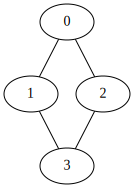

In [45]:
binar.graphviz_repr

In [46]:
for row in binar.tabular_format["*"]:
    print(row)

[0, 0, 0, 0]
[0, 1, 2, 3]
[0, 2, 1, 3]
[0, 3, 3, 3]


In [1]:
# this is the main function used to get the results from a paper
# to reproduce everything, set ``max_cardinality`` to 10
from residuated_binars.use_nitpick import use_nitpick

use_nitpick(max_cardinality=2)